

<h1><center>Comparing Suburbs in Brisbane to find where to buy a house.</center></h1>


## Introduction
Buying a house is everyones dream.But with the numerous options avialable in terms of suburbs,type of residence,location,proximity to venues etc it is hard to decide on which one to buy The decision made on intuition may not always be the right one.So in this project I would like to make use of the insights gained from data to narrow down my choices to a small number which would then make it easier to take a decision..
The project has to be done using Foursqare API.I am using Foursquare API to  get details about venues around a given location.<br>


I recently moved to Indooropilly which is a suburb in  Brisbane, Australia.Living in Indoorooppilly has been a pleasant experience and it also has a great shopping mall and plenty of breakfast and dining options.I have plans of buying a house but don’t know where to buy as I am new to Brisbane.I like Indooroopilly but I would also like to have more choice when it comes to buying a house. <br>

The main assumption I’m making for this project is:<br>
The presence of certain venues in a suburb depend on the people living in the suburb.Hence the venues in a suburb can give you an idea of the community living in the suburb.For example:a suburb that has restaurants serving wide variety of cuisines indicate a multicultural neighbourhood.
In this project I intend to find Suburbs of Brisbane that are similar to Indooroopilly based on venues present in the suburb.

## Data


Brisbane Suburbs names will be scraped from wikipedia .As the post code information is not directly available on wikipedia I have copied it from a file on github that had all the postcode and geocodes of Australia.It will be copied to an excel file converted to csv and then using pandas appended to my original Brisbane suburbs file.Now I have my dataframe with Suburb name,Postcode,Suburb latitude and Suburb longitude.
Next step is to find the different venues in each suburb.Sending a request to the Foursquare API with suburb latitude and longitude will return all the venues in that suburb.For each suburb,I will be extracting venues names,venue category and venue location.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
import requests
import urllib
from bs4 import BeautifulSoup

### Read the CSV file and load data

In [ ]:
##### As the Brisbane suburb postcode information was not directly available on wikipedia I copied geocoded Queensland postcodes
from https://gist.github.com/randomecho/5020859 and converted it into a csv file,'Brislatong.csv'.

In [3]:
col=['Post code','Neighbourhood','Latitude','Longitude']
df=pd.read_csv('Brislatlong.csv',header=None,names=col)
df.tail()

,Post code,Neighbourhood,Latitude,Longitude
335,('4184','Lamb Island',-27.57,153.330)
336,('4184','Macleay Island',-27.57,153.330)
337,('4184','Peel Island',-27.57,153.330)
338,('4184','Perulpa Island',-27.57,153.330)
339,('4184','Russell Island',-27.57,153.330)


#### Data Cleaning

In [7]:
df['Post code'].replace(to_replace="\(\'([0-9]+)\'",value=r"\1",regex = True,inplace=True) #removing bracket and apostrophe from Post code
df['Neighbourhood'].replace(to_replace="\'([A-Z,a-z,\s]+)\'",value=r"\1",regex = True,inplace=True)#removing apostrophe
df['Longitude'].replace(to_replace="([0-9\.]+)\)",value=r"\1",regex = True,inplace=True)#removing bracket
df['Neighbourhood'] = df['Neighbourhood'].str.strip()#removing leading and trailing spaces

###  Now we have all Queensland State postcodes,latitude and  longitude in the dataframe .Now to get the suburbs in Brisbane I will scrape the wikipedia page

In [8]:
sub='https://en.wikipedia.org/wiki/List_of_Brisbane_suburbs'

In [9]:
page = urllib.request.urlopen(sub)
soup = BeautifulSoup(page, 'html.parser')

In [10]:
l=[]
for i in soup.find_all('a'):
    l.append(i.text)


In [11]:
d=l[41:236] #By looking at the list index it can be seen that 41 to 236 contains brisbane suburbs data.
d.remove('edit')
print(d) #List of all suburbs in Brisbane.

['Bowen Hills', 'Brisbane', 'East Brisbane', 'Fortitude Valley', 'Herston', 'Highgate Hill', 'Kangaroo Point', 'Kelvin Grove', 'New Farm', 'Newstead', 'Paddington', 'Petrie Terrace', 'Red Hill', 'South Brisbane', 'Spring Hill', 'Teneriffe', 'West End', 'Woolloongabba', 'Albion', 'Alderley', 'Ascot', 'Aspley', 'Bald Hills', 'Banyo', 'Boondall', 'Bracken Ridge', 'Bridgeman Downs', 'Brighton', 'Brisbane Airport', 'Carseldine', 'Chermside', 'Chermside West', 'Clayfield', 'Deagon', 'Eagle Farm', 'Everton Park', 'Ferny Grove', 'Fitzgibbon', 'Gaythorne', 'Geebung', 'Gordon Park', 'Grange', 'Hamilton', 'Hendra', 'Kalinga', 'Kedron', 'Keperra', 'Lutwyche', 'McDowall', 'Mitchelton', 'Myrtletown', 'Newmarket', 'Northgate', 'Nudgee', 'Nudgee Beach', 'Nundah', 'Pinkenba', 'Sandgate', 'Shorncliffe', 'Stafford', 'Stafford Heights', 'Taigum', 'Virginia', 'Wavell Heights', 'Wilston', 'Windsor', 'Wooloowin', 'Zillmere', 'edit', 'Acacia Ridge', 'Algester', 'Annerley', 'Archerfield', 'Burbank', 'Calamvale

## Selecting rows from dataframe df that match the above Brisbane suburbs.

In [18]:
df=df[df['Neighbourhood'].isin(d)]
df.reset_index(drop=True,inplace=True)#resetting index
df.head()

,Post code,Neighbourhood,Latitude,Longitude
0,4000,Brisbane,-27.47,153.030
1,4000,Spring Hill,-27.47,153.030
2,4001,Brisbane,-27.60,152.820
3,4004,Spring Hill,-24.05,149.320
4,4005,New Farm,-27.47,153.050


In [ ]:
df.to_csv('Bris.csv',index=False)# converting the dataframe to a csv file.

In [115]:
neighborhoods = pd.read_csv("Bris.csv")

In [116]:
neighborhoods.sample(5)

,Post code,Neighbourhood,Latitude,Longitude
37,4034,Aspley,-27.36,153.02
69,4068,Taringa,-27.51,152.98
12,4009,Eagle Farm,-27.43,153.09
172,4179,Lota,-27.47,153.18
116,4108,Coopers Plains,-27.57,153.02


#### Combining neighbourhoods with same post code into one row.
#### The different neighbourhoods are separated by comas and included in the neighbourhood column.

In [117]:
#combining neighbourhoods with same post code into one row.The different neighbourhoods are separated by comas and included in the neighbourhood column.
neighborhoods['Neighbourhood']=neighborhoods[['Post code','Neighbourhood','Latitude','Longitude']].groupby(['Post code'])['Neighbourhood'].transform(lambda x: ','.join(x))

In [118]:
neighborhoods.drop_duplicates(inplace=True)

In [119]:
neighborhoods.reset_index(drop=True,inplace=True)

In [120]:
neighborhoods[30:35]

,Post code,Neighbourhood,Latitude,Longitude
30,4066,"Auchenflower,Toowong",-27.48,152.99
31,4067,St Lucia,-27.49,153.01
32,4068,"Chelmer,Indooroopilly,Taringa",-27.51,152.98
33,4069,"Brookfield,Chapel Hill,Fig Tree Pocket,Kenmore...",-27.49,152.90
34,4070,"Anstead,Bellbowrie,Moggill",-27.55,152.87


#### The suburb with postcode 4068 is the one where I live and the one that I am interested in.

In [121]:
print('Brisbane has {} suburbs'.format(neighborhoods.shape[0]))

Brisbane has 75 suburbs


In [122]:
# Find geographic coordinates for Brisbane.
address = 'Brisbane, QLD'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brisbane are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brisbane are -27.4689682, 153.0234991.


In [123]:
# create map of Brisbane using latitude and longitude values
map_bris = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bris)  
    
map_bris

#### Define Foursquare credentials and values

In [125]:

#CLIENT_ID = 'xxxx' # your Foursquare ID
#CLIENT_SECRET = 'xxxx' # your Foursquare Secret
#VERSION = '20180605' # Foursquare API version




### Use Foursquare to select venues in Indooroopilly

In [126]:
neighborhood_latitude =neighborhoods.loc[32, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[32, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[32, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Chelmer,Indooroopilly,Taringa are -27.51, 152.98.


#### Lets select all venues that are in Chelmer,Indooroopilly,Taringa within radius of 1500m

In [127]:
LIMIT = 100
radius = 1500 # type your answer here
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude,
    radius,
    LIMIT)
print(url)

https://api.foursquare.com/v2/venues/explore?&client_id=WK3SG1UC1ON3HVHXYDIIEYDEKDMM0D31O3WOALS2RSRWYLNJ&client_secret=OHYE1FS4ODS4EBGUZ1141USZVAONDOA1CLEQJTVPEPGRF2LE&v=20180604&ll=-27.51,152.98&radius=1500&limit=100


In [128]:
results = requests.get(url).json()
#results

In [129]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### stucture into a pandas dataframe

In [133]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
print('10 Venues in Indooroopilly')
nearby_venues.sample(10)

10 Venues in Indooroopilly


,name,categories,lat,lng
42,Sushi Sushi,Sushi Restaurant,-27.498324,152.972834
58,Sublime Espresso Bar,Coffee Shop,-27.522576,152.980230
1,Thai Aroy,Thai Restaurant,-27.503092,152.977067
47,McDonald's,Fast Food Restaurant,-27.499762,152.976038
26,Hanaichi,Japanese Restaurant,-27.501158,152.972285
48,KFC,Fast Food Restaurant,-27.497626,152.974370
28,Laksa Hut,Malay Restaurant,-27.502011,152.974361
2,Three Girls Skipping,Café,-27.521683,152.975985
43,Target,Big Box Store,-27.500800,152.972477
37,Kmart,Department Store,-27.499288,152.972828


### Lets look at venue categories in Indooroopilly in decreasing order of count

In [192]:
nearby_venues.groupby(['categories'])['categories'].count().reset_index(name='count').sort_values('count',ascending=False).head(15)



,categories,count
4,Coffee Shop,6
2,Café,6
9,Fast Food Restaurant,5
18,Japanese Restaurant,3
32,Sushi Restaurant,3
5,Convenience Store,2
6,Department Store,2
33,Thai Restaurant,2
22,Multiplex,2
31,Supermarket,2


### category of venues returned by Foursquare

In [134]:
nearby_venues.categories.unique()

array(['Steakhouse', 'Thai Restaurant', 'Café', 'Sushi Restaurant',
       'Diner', 'Coffee Shop', 'Indonesian Restaurant', 'Shopping Mall',
       'Golf Course', 'Bar', 'Japanese Restaurant', 'Ramen Restaurant',
       'Gym', 'Supermarket', 'Ice Cream Shop', 'Electronics Store',
       'Clothing Store', 'Movie Theater', 'Pharmacy', 'Multiplex',
       'Vietnamese Restaurant', 'Malay Restaurant', 'Convenience Store',
       'Department Store', 'Gas Station', 'Sandwich Place',
       'Indie Movie Theater', 'Food Court', 'Juice Bar', 'Pub',
       'Big Box Store', 'Fast Food Restaurant', 'Pizza Place',
       'Seafood Restaurant', 'Train Station', 'French Restaurant',
       "Women's Store"], dtype=object)

In [135]:
print('{} venues were returned by Foursquare for Indooroopilly.'.format(nearby_venues.shape[0]))

61 venues were returned by Foursquare for Indooroopilly.


#### Foursquare API has returned a total of 60 venues in Indooroopilly

### Explore neighbouhoods in Brisbane

In [193]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Running the function on each neighbourhood in Brisbane

In [194]:
bris_venues = getNearbyVenues(names=neighborhoods['Neighbourhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

In [195]:
bris_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Brisbane,Spring Hill",-27.47,153.03,Riverbar & Kitchen,-27.468006,153.030904,Restaurant
1,"Brisbane,Spring Hill",-27.47,153.03,Maru Korean Restaurant,-27.470046,153.026574,Korean Restaurant
2,"Brisbane,Spring Hill",-27.47,153.03,Apple Brisbane,-27.468421,153.027355,Electronics Store
3,"Brisbane,Spring Hill",-27.47,153.03,Folio Books,-27.470704,153.029050,Bookstore
4,"Brisbane,Spring Hill",-27.47,153.03,Grill'd,-27.471449,153.027070,Burger Joint


In [196]:
sh_mall=bris_venues[['Neighborhood','Venue']].loc[(bris_venues['Venue Category'] == 'Shopping Mall')]

print('{} of Brisbane suburbs have shopping malls'.format(sh_mall['Neighborhood'].unique().shape[0]))

32 of Brisbane suburbs have shopping malls


In [197]:
print("There are " + str(bris_venues['Venue Category'].unique().shape[0]) + " unique categories in Brisbane venues")
#sorted(totCategory)

There are 231 unique categories in Brisbane venues


### There are 231 categories in venues and most categories have only 1 venue in a suburb.
### Hence I am going to generalise these categories into 7 main categories .
### These are 'Restaurant','Pub','Cafe_Dessert','Activities','Grocery'and 'Mall'.'General'
### As I would like a shopping mall in the suburb I plan to buy,I have included Shopping mall as a category

In [199]:
Cafe = ['Yogurt','Bakery','Donut','Coffee','Dessert','Cream','Cupcake','Tea','Frozen','Cafeteria','Café','Juice']
Restaurant = ['Restaurant','Pizza','Food','Breakfast','Sandwich',
             'BBQ','Sushi','Salad','Bagel','Creperie','Diner',
              'Snack','Pie','Bistro','Chips','Steakhouse','Burger','Chicken','Sushi','Ramen','Hotel']

Pub = ['Brewery','Wine', 'Bar','Cocktail','Beer','Pub','Gastropub','Whisky']



Activities = ['Trail','Scenic Lookout','Baseball','Farm','Park','Theater','Tennis','Dance','Skating','Enertainment','Art','Museum','Historic'\
'Recreation','Beach','Pool','Hockey','Volleyball','Planetarium','Gym','Movie','Racetrack','Soccer','Rink','Golf','Garden',
              'Historic','Club','Zoo','Kart','Bowling','Cricket','Multiplex']

Grocery = ['Grocery','Market','Deli','Cheese','Supermarket','Convenience','Gourmet']

mall= ['Mall']
def gencat(dfven):
    p = []
    
    for index,row in dfven.iterrows():
        item=row['Venue Category'].split()
    
        for i in item:
            f=0
            #print(f,item)
            if i in Restaurant:
                p.append('Restaurant')
                f=1
                break;
            elif i in Pub:
                p.append('Pub')
                f=1
                break;
            elif i in Cafe:
                p.append('Cafe_Dessert')
                f=1
                break;
            elif i in Activities:
                p.append('Activities')
                f=1
                break;
            elif i in Grocery:
                p.append('Grocery')
                f=1
                break;
            elif i in mall:
                p.append('Shopping Mall')
                f=1
                break;
        if f==0:
            #print(f,item)
            p.append('General')
        
    dic = {'cat':p}
    df = pd.DataFrame(dic)
    dfven['Gcategory'] = df['cat']
    return dfven
   

In [200]:

gencat(bris_venues)
bris_venues[['Venue Category','Gcategory']].sample(10)

,Venue Category,Gcategory
1038,Café,Cafe_Dessert
781,Café,Cafe_Dessert
1762,Department Store,General
435,Coffee Shop,Cafe_Dessert
2048,Café,Cafe_Dessert
2149,Coffee Shop,Cafe_Dessert
49,Café,Cafe_Dessert
1915,Dessert Shop,Cafe_Dessert
112,Italian Restaurant,Restaurant
1896,Fast Food Restaurant,Restaurant


### Lets have a look at how many venues are present in each suburb

### Number of venues in each suburb 

In [215]:
b=bris_venues.groupby(['Neighborhood','Gcategory'])['Gcategory'].count().reset_index(name='count')
totnumvenues=bris_venues.groupby(['Neighborhood'])['Gcategory'].count().reset_index(name='sum')
Avg=totnumvenues['sum'].sum()/(totnumvenues['sum'].count())
print('An average of {} venues per suburb was returned'.format(Avg))

An average of 31.45945945945946 venues per suburb was returned


In [144]:
from sklearn import preprocessing

x = totnumvenues['sum'].values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
x_scaled
totnumvenues['numven'] = pd.DataFrame(x_scaled)
totnumvenues.drop(['sum'],axis=1,inplace =True)
totnumvenues.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Neighborhood,numven
0,"Acacia Ridge,Heathwood,Larapinta,Pallara,Willa...",0.060606
1,Albion,0.242424
2,"Alderley,Enoggera,Gaythorne,Grange,Newmarket,W...",0.292929
3,"Algester,Parkinson",0.131313
4,"Annerley,Fairfield",0.494949


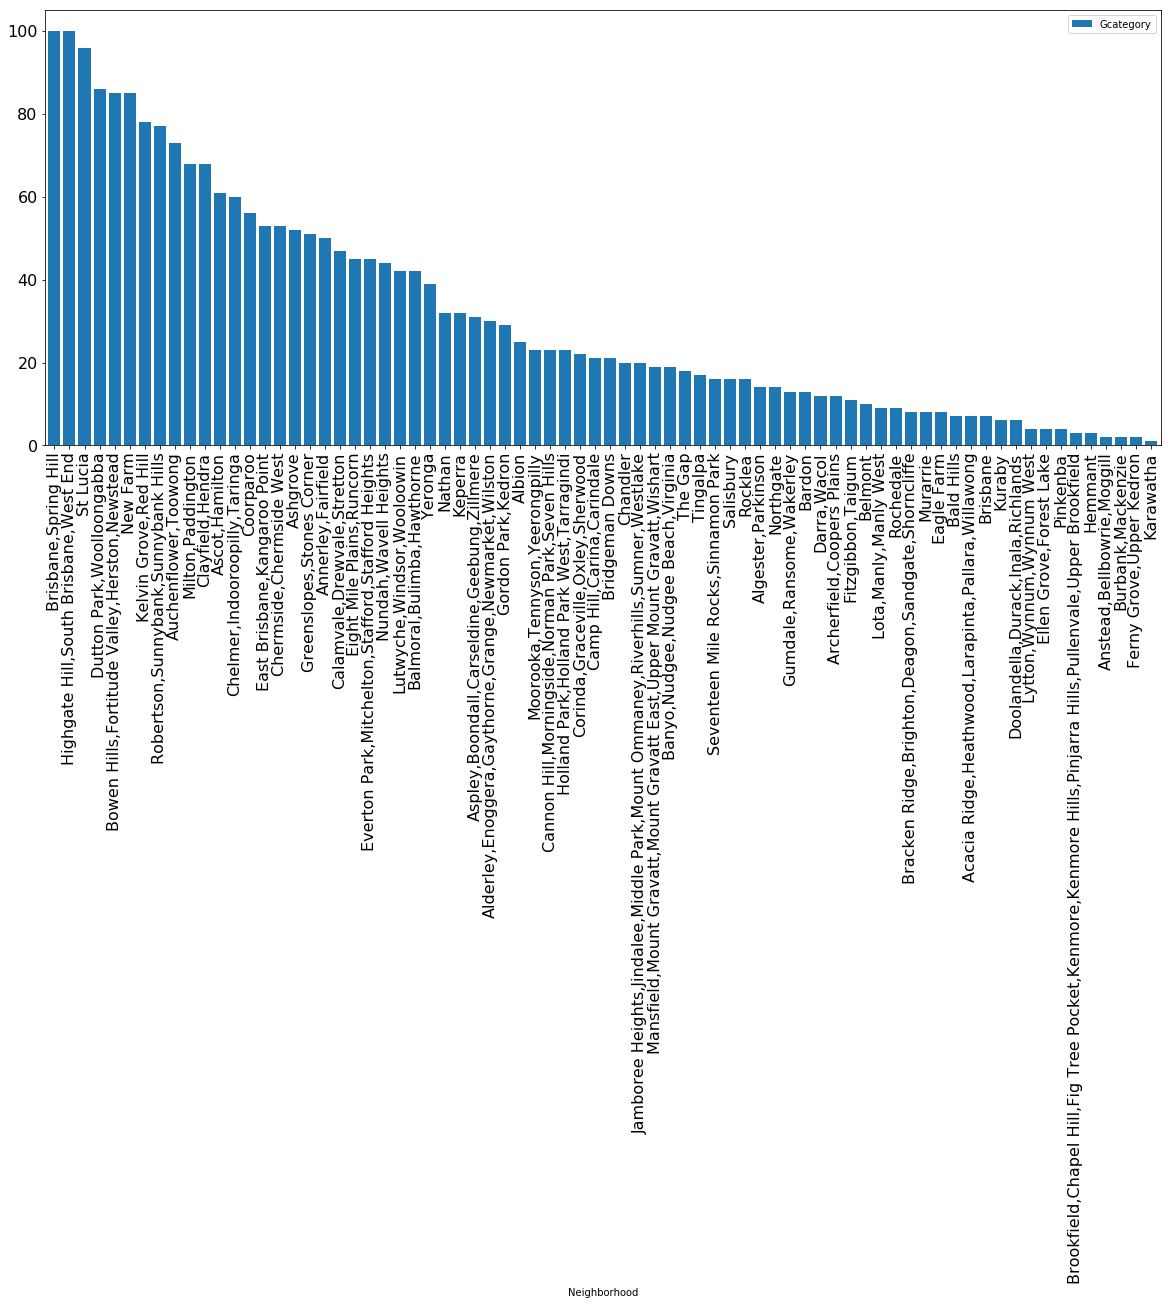

In [213]:
totnumvenues=bris_venues.groupby(['Neighborhood'])[['Gcategory']].count().sort_values('Gcategory',ascending=False)
totnumvenues.plot(kind='bar',figsize=(20, 8), width=0.8, fontsize=16)



### Creating a column with total number of venues and normalising it

### One hot encoding for generalised categories

In [145]:
# one hot encoding
bris_onehot = pd.get_dummies(bris_venues[['Gcategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bris_onehot['Neighborhood'] = bris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bris_onehot.columns[-1]] + list(bris_onehot.columns[:-1])
bris_onehot = bris_onehot[fixed_columns]

bris_onehot.head()

,Neighborhood,Activities,Cafe_Dessert,General,Grocery,Pub,Restaurant,Shopping Mall
0,"Brisbane,Spring Hill",0,0,0,0,0,1,0
1,"Brisbane,Spring Hill",0,0,0,0,0,1,0
2,"Brisbane,Spring Hill",0,0,1,0,0,0,0
3,"Brisbane,Spring Hill",0,0,1,0,0,0,0
4,"Brisbane,Spring Hill",0,0,0,0,0,1,0


### Grouping rows by neighbourhood and taking mean of occurence of each category

In [146]:
bris_grouped = bris_onehot.groupby('Neighborhood').mean().reset_index()
#bris_grouped

### Merging the total number of venues as a column 

In [147]:
bris_grouped=pd.merge(bris_grouped, totnumvenues, on='Neighborhood')
bris_grouped.head()

,Neighborhood,Activities,Cafe_Dessert,General,Grocery,Pub,Restaurant,Shopping Mall,numven
0,"Acacia Ridge,Heathwood,Larapinta,Pallara,Willa...",0.285714,0.00,0.000000,0.142857,0.000000,0.571429,0.00,0.060606
1,Albion,0.200000,0.16,0.200000,0.000000,0.080000,0.360000,0.00,0.242424
2,"Alderley,Enoggera,Gaythorne,Grange,Newmarket,W...",0.133333,0.10,0.366667,0.100000,0.033333,0.266667,0.00,0.292929
3,"Algester,Parkinson",0.285714,0.00,0.000000,0.285714,0.000000,0.428571,0.00,0.131313
4,"Annerley,Fairfield",0.160000,0.18,0.200000,0.140000,0.000000,0.300000,0.02,0.494949


In [ ]:
### Cluster Brisbane Neighbourhoods into 3 clusters.As similar neighbourhoods will be clustered together I can then analyse the cluster in which Indooroopilly is present to find similar suburbs

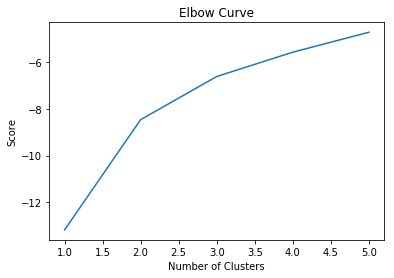

In [154]:
import pylab as pl
%matplotlib inline
Nc = range(1, 6)

kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(bris_grouped_clustering).score(bris_grouped_clustering) for i in range(len(kmeans))]
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

### From the above elbow plot ideal number of cluster =3.Cluster Brisbane Neighbourhoods into 3 clusters.As similar neighbourhoods will be clustered together I can then analyse the cluster in which Indooroopilly is present to find similar suburbs

In [155]:
# set number of clusters
kclusters = 3

bris_grouped_clustering = bris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,n_init=25,random_state=10).fit(bris_grouped_clustering)


# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1,
       0, 0, 2, 2, 1, 0, 2, 2], dtype=int32)

In [156]:
neighborhoods=neighborhoods.dropna(how='any')

### Adding cluster labels

In [157]:
bris_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [158]:
bris_grouped.head()

,Cluster Labels,Neighborhood,Activities,Cafe_Dessert,General,Grocery,Pub,Restaurant,Shopping Mall,numven
0,2,"Acacia Ridge,Heathwood,Larapinta,Pallara,Willa...",0.285714,0.00,0.000000,0.142857,0.000000,0.571429,0.00,0.060606
1,2,Albion,0.200000,0.16,0.200000,0.000000,0.080000,0.360000,0.00,0.242424
2,0,"Alderley,Enoggera,Gaythorne,Grange,Newmarket,W...",0.133333,0.10,0.366667,0.100000,0.033333,0.266667,0.00,0.292929
3,2,"Algester,Parkinson",0.285714,0.00,0.000000,0.285714,0.000000,0.428571,0.00,0.131313
4,1,"Annerley,Fairfield",0.160000,0.18,0.200000,0.140000,0.000000,0.300000,0.02,0.494949


### merge bris_grouped with  brisbane suburb data to add latitude/longitude for each neighborhood.

In [159]:

#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bris_merged = neighborhoods
bris_merged = bris_merged.join(bris_grouped.set_index('Neighborhood'), on='Neighbourhood')

bris_merged.head() 

,Post code,Neighbourhood,Latitude,Longitude,Cluster Labels,Activities,Cafe_Dessert,General,Grocery,Pub,Restaurant,Shopping Mall,numven
0,4000,"Brisbane,Spring Hill",-27.47,153.03,1.0,0.120000,0.240000,0.160000,0.010000,0.080000,0.380000,0.010000,1.000000
1,4001,Brisbane,-27.60,152.82,0.0,0.000000,0.000000,0.571429,0.142857,0.000000,0.285714,0.000000,0.060606
2,4004,Spring Hill,-24.05,149.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4005,New Farm,-27.47,153.05,1.0,0.164706,0.235294,0.152941,0.094118,0.058824,0.282353,0.011765,0.848485
4,4006,"Bowen Hills,Fortitude Valley,Herston,Newstead",-27.44,153.04,1.0,0.129412,0.164706,0.211765,0.070588,0.047059,0.341176,0.035294,0.848485


In [160]:
# dropping row with nan
bris_merged=bris_merged.dropna(how='any')

In [161]:
#converting cluster labels to int data type
bris_merged['Cluster Labels']=bris_merged['Cluster Labels'].astype(int)

In [162]:
bris_merged['Cluster Labels'].dtype

dtype('int64')

#### Visualising the 3 clusters

In [163]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bris_merged['Latitude'], bris_merged['Longitude'], bris_merged['Neighbourhood'], bris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine clusters

#### First Cluster
##### Indooroopilly belongs to this cluster.Hence this is the cluster I am interested in.

In [168]:
Interestedclus=bris_merged.loc[bris_merged['Cluster Labels'] == 1]
Interestedclus=Interestedclus[['Neighbourhood','Activities','Cafe_Dessert','General','Grocery','Pub','Restaurant','Shopping Mall','numven']]

In [169]:
Interestedclus.set_index('Neighbourhood',inplace=True)

In [170]:
Interestedclus.shape

(23, 8)

In [171]:
Interestedclus.head(23)

,Activities,Cafe_Dessert,General,Grocery,Pub,Restaurant,Shopping Mall,numven
Neighbourhood,,,,,,,,
"Brisbane,Spring Hill",0.120000,0.240000,0.160000,0.010000,0.080000,0.380000,0.010000,1.000000
New Farm,0.164706,0.235294,0.152941,0.094118,0.058824,0.282353,0.011765,0.848485
"Bowen Hills,Fortitude Valley,Herston,Newstead",0.129412,0.164706,0.211765,0.070588,0.047059,0.341176,0.035294,0.848485
"Ascot,Hamilton",0.081967,0.196721,0.147541,0.114754,0.000000,0.442623,0.016393,0.606061
"Clayfield,Hendra",0.117647,0.205882,0.250000,0.117647,0.000000,0.294118,0.014706,0.676768
"Nundah,Wavell Heights",0.159091,0.204545,0.250000,0.113636,0.045455,0.181818,0.045455,0.434343
"Chermside,Chermside West",0.094340,0.169811,0.301887,0.075472,0.018868,0.320755,0.018868,0.525253
"Everton Park,Mitchelton,Stafford,Stafford Heights",0.044444,0.200000,0.288889,0.133333,0.000000,0.333333,0.000000,0.444444
"Kelvin Grove,Red Hill",0.128205,0.269231,0.115385,0.102564,0.051282,0.333333,0.000000,0.777778


### There are 23 suburbs in this cluster.So I am going to calculate distance of each neighbourhood to other neighbourhoods in this cluster using distance-matrix function

In [172]:
#Distance matrix calculation
from scipy.spatial import distance_matrix

d=pd.DataFrame(distance_matrix(Interestedclus.values, Interestedclus.values), index=Interestedclus.index, columns=Interestedclus.index)


### Selecting the distance matrix for Indooroopilly suburb

In [173]:
#d.loc['Chelmer,Indooroopilly,Taringa'].sort_values(axis=0, ascending=True)
Sim=d.loc['Chelmer,Indooroopilly,Taringa'].to_frame()
Sim.rename(columns={'Chelmer,Indooroopilly,Taringa':'Distance'},inplace=True)

In [174]:
#combining this distance measure with the cluster of interest
I=Interestedclus.join(Sim)
I.reset_index(level=0, inplace=True)
I.head(10)

,Neighbourhood,Activities,Cafe_Dessert,General,Grocery,Pub,Restaurant,Shopping Mall,numven,Distance
0,"Brisbane,Spring Hill",0.120000,0.240000,0.160000,0.010000,0.080000,0.380000,0.010000,1.000000,0.413741
1,New Farm,0.164706,0.235294,0.152941,0.094118,0.058824,0.282353,0.011765,0.848485,0.272008
2,"Bowen Hills,Fortitude Valley,Herston,Newstead",0.129412,0.164706,0.211765,0.070588,0.047059,0.341176,0.035294,0.848485,0.271668
3,"Ascot,Hamilton",0.081967,0.196721,0.147541,0.114754,0.000000,0.442623,0.016393,0.606061,0.102569
4,"Clayfield,Hendra",0.117647,0.205882,0.250000,0.117647,0.000000,0.294118,0.014706,0.676768,0.157608
5,"Nundah,Wavell Heights",0.159091,0.204545,0.250000,0.113636,0.045455,0.181818,0.045455,0.434343,0.273516
6,"Chermside,Chermside West",0.094340,0.169811,0.301887,0.075472,0.018868,0.320755,0.018868,0.525253,0.187047
7,"Everton Park,Mitchelton,Stafford,Stafford Heights",0.044444,0.200000,0.288889,0.133333,0.000000,0.333333,0.000000,0.444444,0.231461
8,"Kelvin Grove,Red Hill",0.128205,0.269231,0.115385,0.102564,0.051282,0.333333,0.000000,0.777778,0.194316
9,Ashgrove,0.115385,0.365385,0.076923,0.096154,0.038462,0.250000,0.057692,0.515152,0.211647


In [175]:
### Sorting the suburbs based on distance.Nine suburbs that are most similar to Indooroopilly are displayed

In [182]:
I=pd.merge(I,neighborhoods[['Latitude','Longitude','Neighbourhood']],on='Neighbourhood')
I=I.sort_values(by=['Distance']).head(10)
I[1:10][['Neighbourhood','Distance']]


,Neighbourhood,Distance
3,"Ascot,Hamilton",0.102569
20,"Greenslopes,Stones Corner",0.117149
21,Coorparoo,0.119059
10,"Milton,Paddington",0.122269
4,"Clayfield,Hendra",0.157608
16,"Annerley,Fairfield",0.161874
6,"Chermside,Chermside West",0.187047
11,"Auchenflower,Toowong",0.193157
8,"Kelvin Grove,Red Hill",0.194316


In [177]:
### Count of venues in each suburb

In [178]:
v=I.sort_values(by=['Distance']).head(10)

v=b[b['Neighborhood'].isin(v.Neighbourhood.values.tolist())]
b_map = v.pivot_table(index='Neighborhood', columns='Gcategory', values='count', fill_value=0)
b_map

Gcategory,Activities,Cafe_Dessert,General,Grocery,Pub,Restaurant,Shopping Mall
Neighborhood,,,,,,,
"Annerley,Fairfield",8,9,10,7,0,15,1
"Ascot,Hamilton",5,12,9,7,0,27,1
"Auchenflower,Toowong",13,13,15,5,5,20,2
"Chelmer,Indooroopilly,Taringa",7,14,9,5,2,22,1
"Chermside,Chermside West",5,9,16,4,1,17,1
"Clayfield,Hendra",8,14,17,8,0,20,1
Coorparoo,2,15,8,8,1,22,0
"Greenslopes,Stones Corner",4,14,8,5,3,17,0
"Kelvin Grove,Red Hill",10,21,9,8,4,26,0


# Visualising 10 most similar suburbs

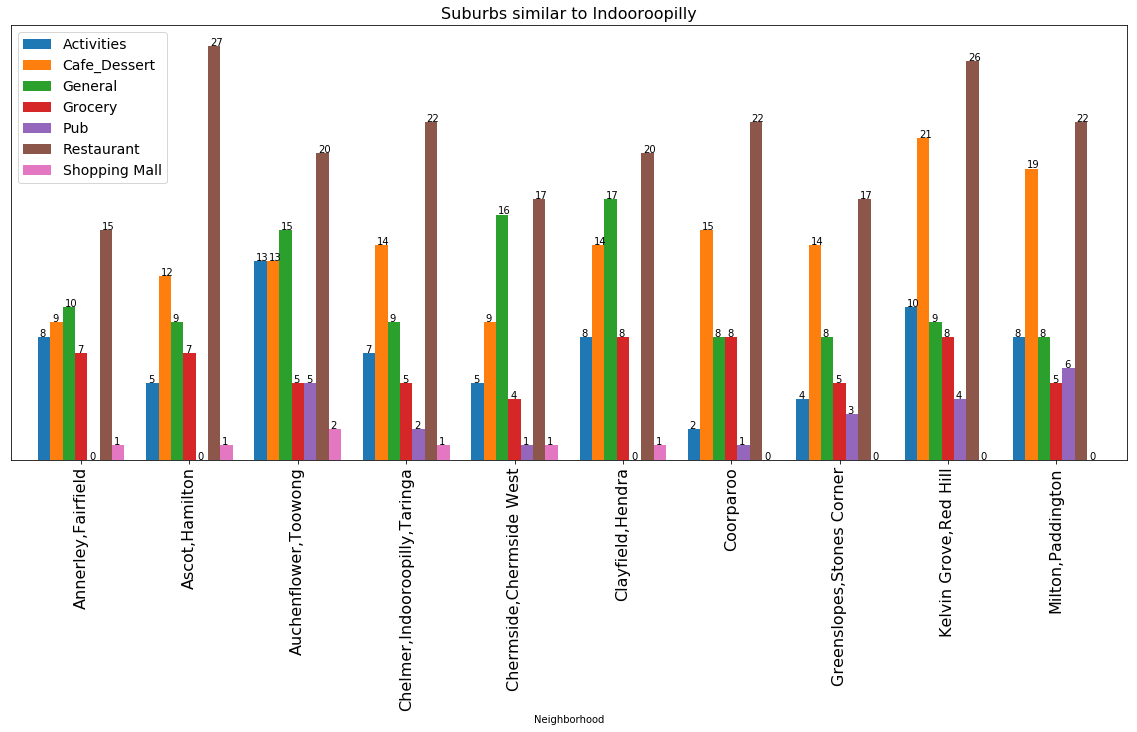

In [179]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
ax = b_map.plot(kind='bar',figsize=(20, 8), width=0.8, fontsize=16)

ax.tick_params(left=False)
ax.tick_params(labelleft=False)
ax.set_title("Suburbs similar to Indooroopilly", fontsize =16)
ax.legend(fontsize=14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(str(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))

### Visualising all similar suburbs on a map.As similarity decreases the bubble size gets smaller

In [183]:
map_ind = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood,dist in zip(I['Latitude'], I['Longitude'], I['Neighbourhood'],I['Distance']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=(1-(dist*2))*20,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ind)  
    
map_ind

### Second Cluster

In [189]:
bris_merged.loc[bris_merged['Cluster Labels'] == 2].shape

(24, 13)

In [185]:
bris_merged.loc[bris_merged['Cluster Labels'] == 2]

,Post code,Neighbourhood,Latitude,Longitude,Cluster Labels,Activities,Cafe_Dessert,General,Grocery,Pub,Restaurant,Shopping Mall,numven
8,4010,Albion,-27.43,153.05,2,0.200000,0.160000,0.200000,0.000000,0.080000,0.360000,0.000000,0.242424
12,4014,"Banyo,Nudgee,Nudgee Beach,Virginia",-27.38,153.08,2,0.052632,0.421053,0.157895,0.000000,0.105263,0.263158,0.000000,0.181818
18,4034,"Aspley,Boondall,Carseldine,Geebung,Zillmere",-27.36,153.02,2,0.096774,0.096774,0.225806,0.225806,0.000000,0.354839,0.000000,0.303030
19,4035,Bridgeman Downs,-27.35,152.97,2,0.142857,0.095238,0.095238,0.047619,0.095238,0.476190,0.047619,0.202020
29,4065,Bardon,-27.46,152.98,2,0.076923,0.461538,0.076923,0.000000,0.000000,0.307692,0.076923,0.121212
33,4069,"Brookfield,Chapel Hill,Fig Tree Pocket,Kenmore...",-27.49,152.90,2,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.020202
35,4073,"Seventeen Mile Rocks,Sinnamon Park",-27.55,152.96,2,0.062500,0.187500,0.250000,0.125000,0.062500,0.250000,0.062500,0.151515
39,4077,"Doolandella,Durack,Inala,Richlands",-27.61,152.98,2,0.000000,0.000000,0.000000,0.333333,0.000000,0.500000,0.166667,0.050505
40,4078,"Ellen Grove,Forest Lake",-27.61,152.95,2,0.000000,0.250000,0.000000,0.500000,0.000000,0.250000,0.000000,0.030303
44,4104,Yeronga,-27.52,153.02,2,0.205128,0.128205,0.102564,0.102564,0.025641,0.410256,0.025641,0.383838


### Third Cluster

In [188]:
bris_merged.loc[bris_merged['Cluster Labels'] == 0].shape

(27, 13)

In [89]:
bris_merged.loc[bris_merged['Cluster Labels'] == 0]


,Post code,Neighbourhood,Latitude,Longitude,Cluster Labels,Activities,Cafe_Dessert,General,Grocery,Pub,Restaurant,Shopping Mall,numven
0,4000,"Brisbane,Spring Hill,Brisbane,Spring Hill",-27.47,153.03,0,0.120000,0.240000,0.160000,0.010000,0.080000,0.380000,0.010000,1.000000
3,4005,New Farm,-27.47,153.05,0,0.181818,0.215909,0.147727,0.090909,0.068182,0.284091,0.011364,0.877551
4,4006,"Bowen Hills,Fortitude Valley,Herston,Newstead,...",-27.44,153.04,0,0.149425,0.195402,0.160920,0.080460,0.057471,0.321839,0.034483,0.867347
5,4007,"Ascot,Hamilton,Ascot,Hamilton",-27.43,153.06,0,0.063492,0.190476,0.142857,0.142857,0.000000,0.444444,0.015873,0.622449
9,4011,"Clayfield,Hendra,Clayfield,Hendra",-27.42,153.06,0,0.101449,0.202899,0.231884,0.130435,0.000000,0.318841,0.014493,0.683673
10,4012,"Nundah,Wavell Heights,Nundah,Wavell Heights",-27.40,153.06,0,0.162791,0.255814,0.209302,0.093023,0.046512,0.186047,0.046512,0.418367
17,4032,"Chermside,Chermside West,Chermside,Chermside West",-27.39,153.03,0,0.096154,0.153846,0.307692,0.076923,0.019231,0.326923,0.019231,0.510204
22,4053,"Everton Park,Mitchelton,Stafford,Stafford Heig...",-27.41,152.98,0,0.041667,0.270833,0.229167,0.104167,0.000000,0.354167,0.000000,0.469388
25,4059,"Kelvin Grove,Red Hill,Kelvin Grove,Red Hill",-27.45,153.01,0,0.125000,0.300000,0.075000,0.100000,0.062500,0.337500,0.000000,0.795918
26,4060,Ashgrove,-27.45,152.99,0,0.100000,0.420000,0.100000,0.080000,0.040000,0.220000,0.040000,0.489796


### Thank you!